In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\world_population.csv")


In [3]:
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


# Get the no of rows and columns of the dataset


In [4]:
df.shape

(234, 17)

# Get the brief Information of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

# Classify Categorical and Numeric Columns


In [6]:
#int features
int_features=df.select_dtypes(include=["int64"]).columns
print("Total number of integer features: ", int_features.shape[0])

print("Integer Feature names: ", int_features.tolist())

Total number of integer features:  10
Integer Feature names:  ['Rank', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)']


In [7]:
#float features
float_features=df.select_dtypes(include=["float64"]).columns
print("Total number of integer features: ", float_features.shape[0])

print("Float Feature names: ", float_features.tolist())

Total number of integer features:  3
Float Feature names:  ['Density (per km²)', 'Growth Rate', 'World Population Percentage']


In [8]:
#Categorical features
object_features=df.select_dtypes(include=["object"]).columns
print("Total number of integer features: ", object_features.shape[0])

print("Categorical Feature names: ", object_features.tolist())

Total number of integer features:  4
Categorical Feature names:  ['CCA3', 'Country', 'Capital', 'Continent']


# Number of countries by continent


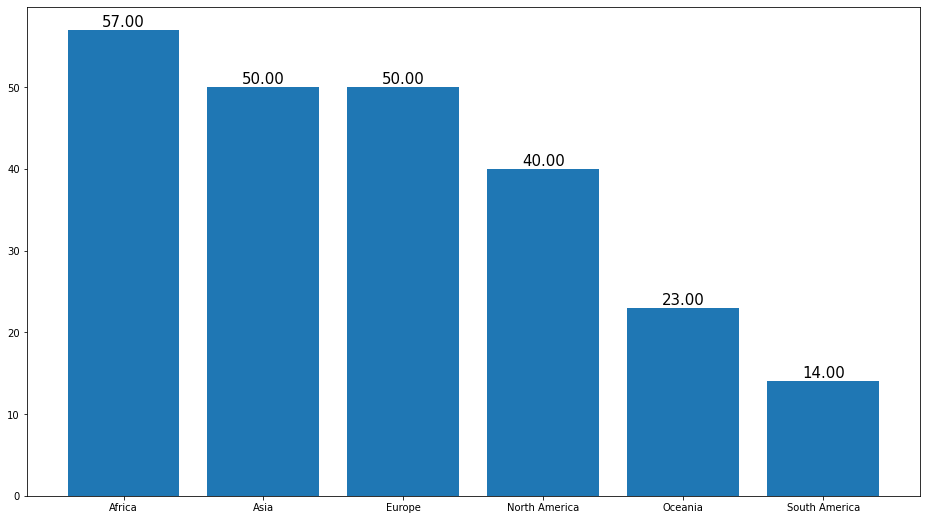

In [9]:
country_count=df["Continent"].value_counts()
x=country_count.index
y=country_count.values
##print(x)
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(x, y)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.2f'),
                   (i.get_x() + i.get_width() / 2,
                    i.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()    

Africa is having max entries and South America is having least entries of country records



# Top 10 populated countries and % population distribution between them (Per 2022 data)

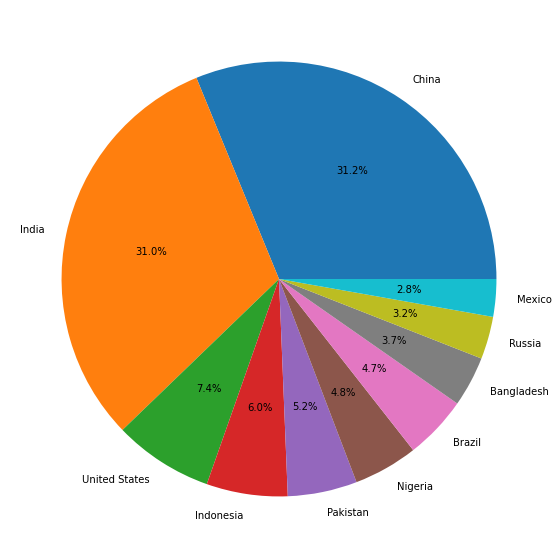

In [10]:
population_2022=df.sort_values(by="2022 Population",ascending=False).head(10)
fig, ax = plt.subplots(figsize =(20, 10))
x=population_2022["Country"]
y=population_2022["2022 Population"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

China, India are most populous countries while Russia and Mexico are least populous countries per 2022 population data



# Continents ranking as per their population (per 2022 data)


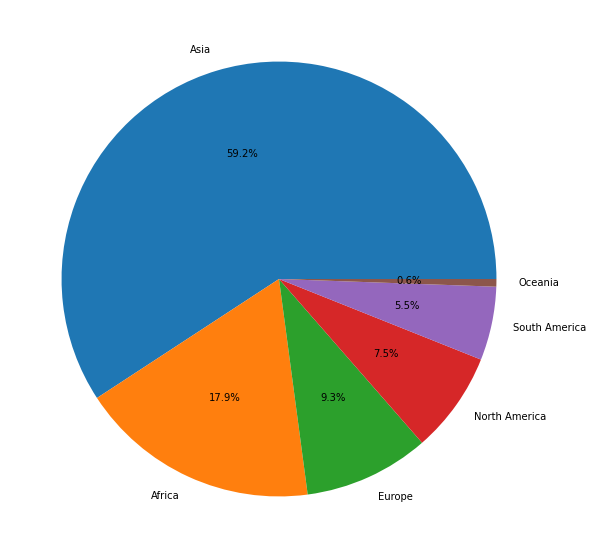

In [11]:
continent_rank=df.groupby(by="Continent").sum().sort_values(by="2022 Population",ascending=False)
fig, ax = plt.subplots(figsize =(20, 10))
x=continent_rank.index
y=continent_rank["2022 Population"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

Asia is the most population continent with percentage of nearly 60% of world population



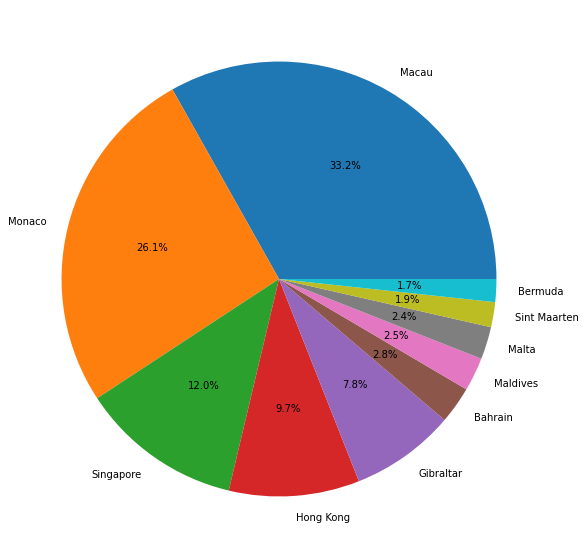

In [12]:
population_2022=df.sort_values(by="Density (per km²)",ascending=False).head(10)
fig, ax = plt.subplots(figsize =(20, 10))
x=population_2022["Country"]
y=population_2022["Density (per km²)"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

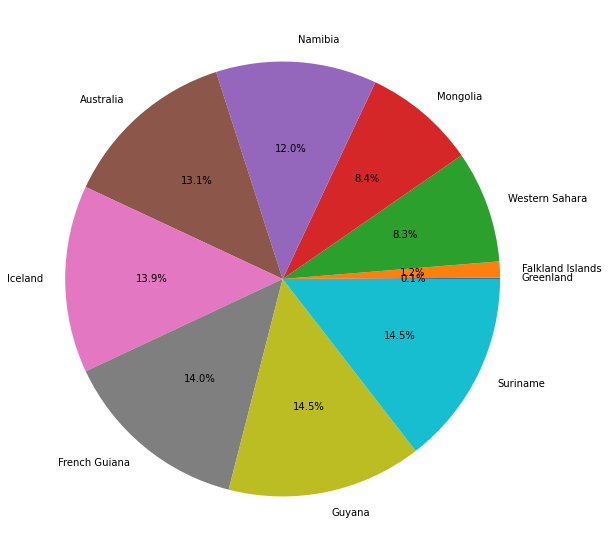

In [13]:
population_2022=df.sort_values(by="Density (per km²)",ascending=True).head(10)
fig, ax = plt.subplots(figsize =(20, 10))
x=population_2022["Country"]
y=population_2022["Density (per km²)"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

# Area (km²) of Top 10 countries

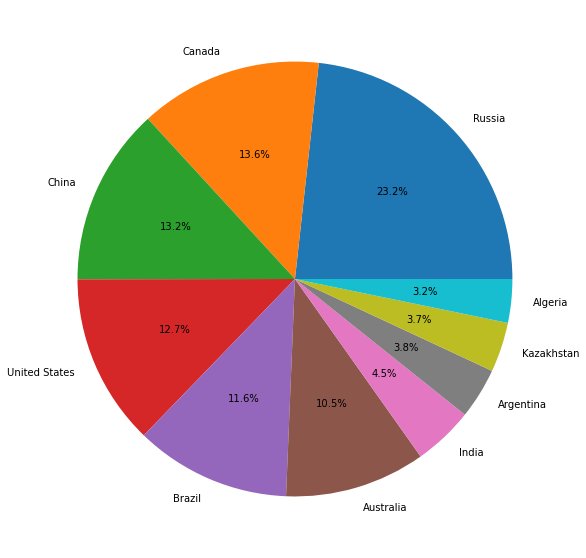

In [14]:
population_2022=df.sort_values(by="Area (km²)",ascending=False).head(10)
fig, ax = plt.subplots(figsize =(20, 10))
x=population_2022["Country"]
y=population_2022["Area (km²)"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

Russia is having greatest Area(23%) with Canada(13%) and China(13%) being second, third while India is just 4.5% area among top 10

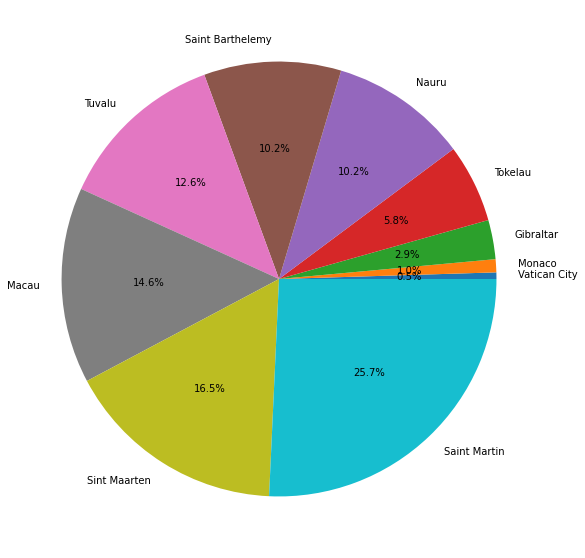

In [15]:
population_2022=df.sort_values(by="Area (km²)",ascending=True).head(10)
fig, ax = plt.subplots(figsize =(20, 10))
x=population_2022["Country"]
y=population_2022["Area (km²)"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

# Growth Rate of Top 10 Countries

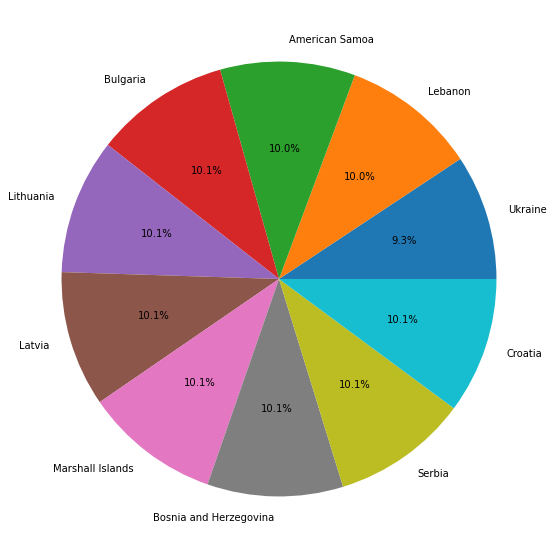

count    234.000000
mean       1.009577
std        0.013385
min        0.912000
25%        1.001775
50%        1.007900
75%        1.016950
max        1.069100
Name: Growth Rate, dtype: float64

In [16]:
population_2022=df.sort_values(by="Growth Rate",ascending=True).head(10)
fig, ax = plt.subplots(figsize =(20, 10))
x=population_2022["Country"]
y=population_2022["Growth Rate"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

df["Growth Rate"].describe()

Growth Rate is almost uniform among the countries



# World Population Percentage of Top 10 countries

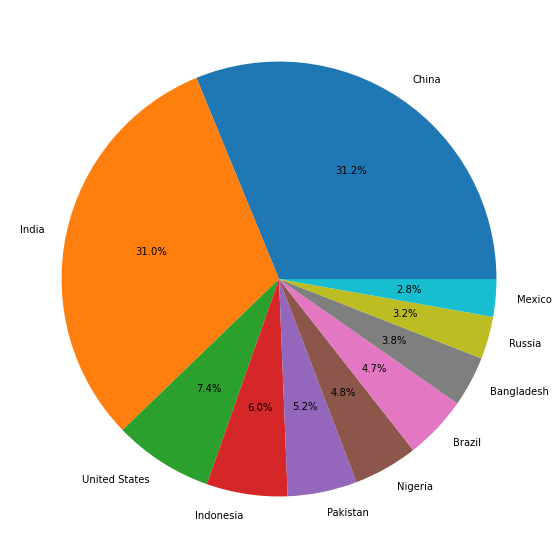

In [17]:
population_2022=df.sort_values(by="World Population Percentage",ascending=False).head(10)
fig, ax = plt.subplots(figsize =(20, 10))
x=population_2022["Country"]
y=population_2022["World Population Percentage"]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

China, India are most populous countries while Russia and Mexico are least populous countries (which is same pattern as column "2022 Population")

In [18]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

41             China
92             India
221    United States
93         Indonesia
156         Pakistan
149          Nigeria
27            Brazil
16        Bangladesh
171           Russia
131           Mexico
Name: Country, dtype: object


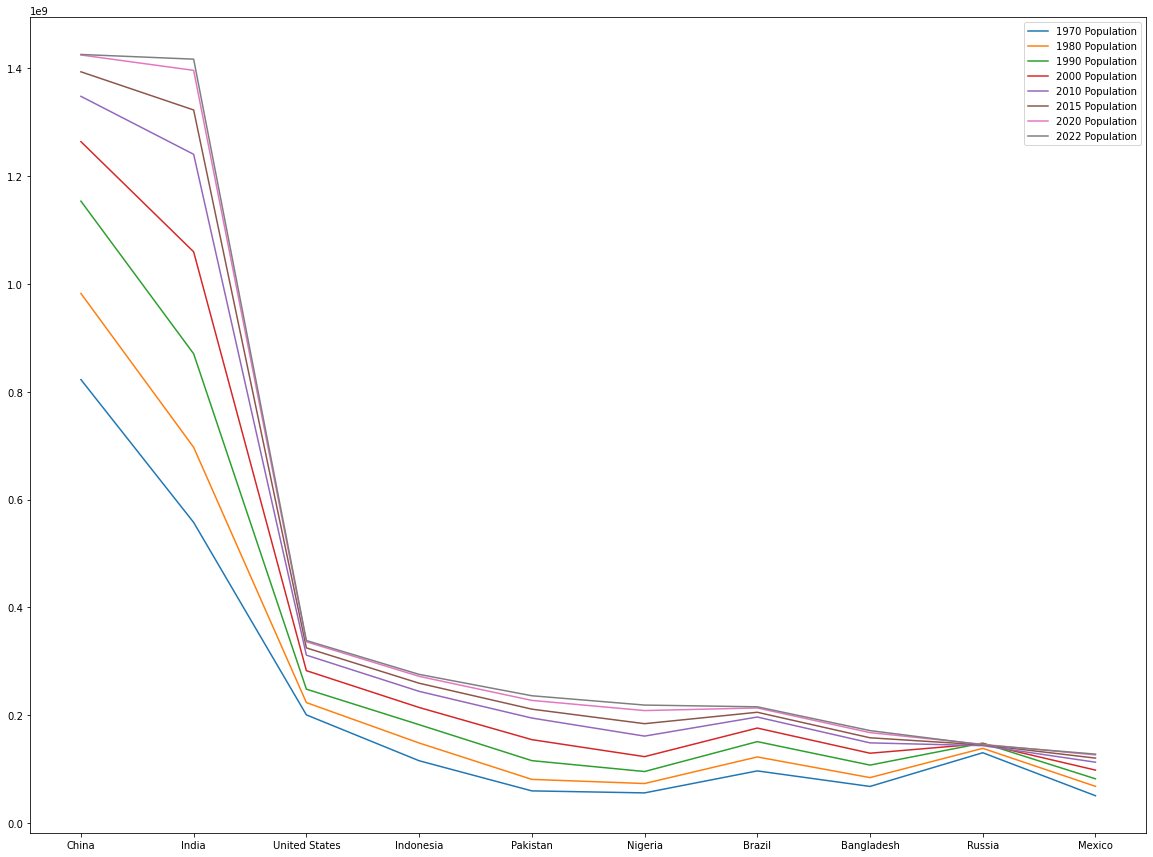

In [19]:
population_2022=df.sort_values(by="2022 Population",ascending=False).head(10)
fig, ax = plt.subplots(figsize =(20, 15))
x=population_2022["Country"]
print(x)

y_2022=population_2022['2022 Population']
y_2020=population_2022['2020 Population']
y_2015=population_2022['2015 Population']
y_2010=population_2022['2010 Population']
y_2000=population_2022['2000 Population']
y_1990=population_2022['1990 Population']
y_1980=population_2022['1980 Population']
y_1970=population_2022['1970 Population']

plt.plot(x, y_1970,label="1970 Population")
plt.plot(x, y_1980,label="1980 Population")
plt.plot(x, y_1990,label="1990 Population")
plt.plot(x, y_2000,label="2000 Population")
plt.plot(x, y_2010,label="2010 Population")
plt.plot(x, y_2015,label="2015 Population")
plt.plot(x, y_2020,label="2020 Population")
plt.plot(x, y_2022,label="2022 Population")

for i in ax.patches:
    ax.annotate(format(i.get_height(), '.2f'),
                   (i.get_x() + i.get_width() / 2,
                    i.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.legend()
plt.show()    

1.Population is consistently increasing every 5-10 years from China being the highest and Mexico being the lowest.

2.India's population is almost in same line as China in last 12 years

3.Considerable increases seen in the years 1970 to 2020 except Russia

4.Russia is the only country that did not show any considerable increase in population in last 50 years

5.India is having population is in increasing order every year and it is almost equal to China population in 2022.


# Country vs Population by their Density and Area

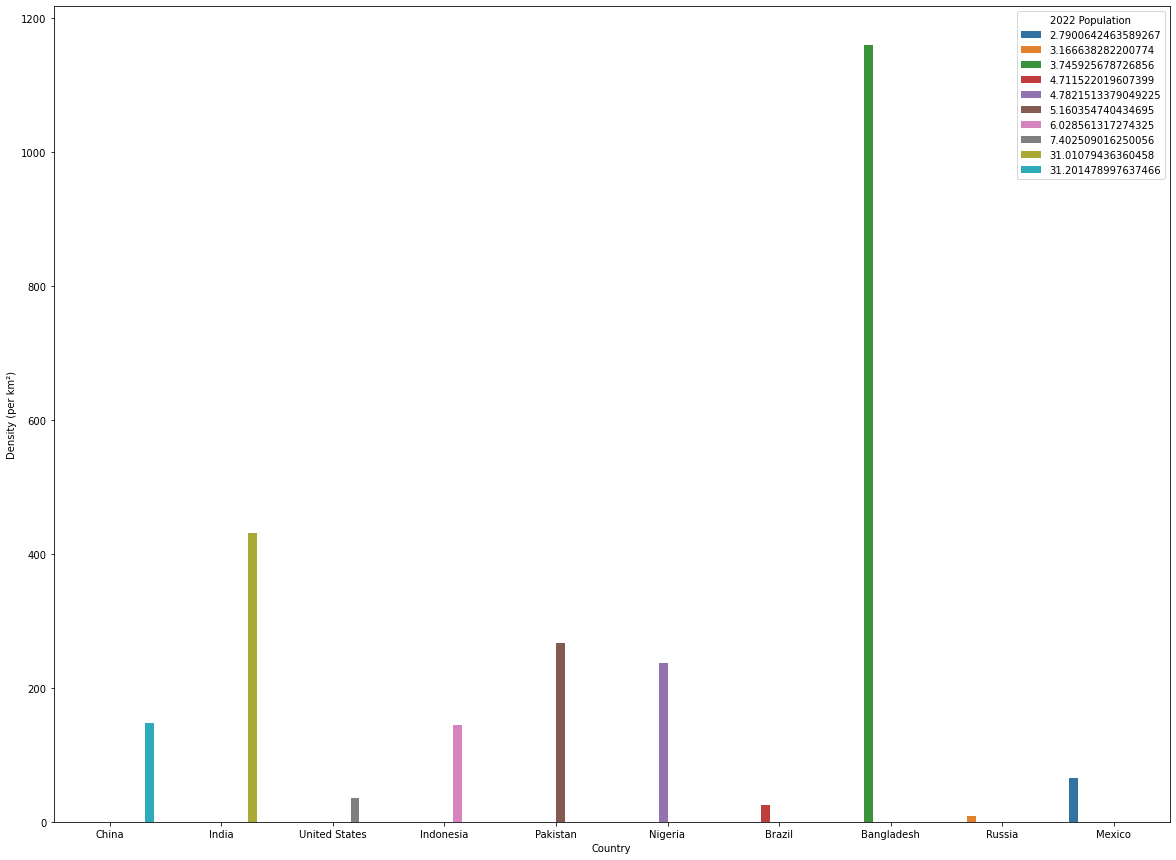

In [20]:
population_2022=df.sort_values(by="2022 Population",ascending=False).head(10)
fig, ax = plt.subplots(figsize =(20, 15))
x=population_2022["Country"]
y=population_2022["Density (per km²)"]
hue=population_2022["2022 Population"]/sum(population_2022["2022 Population"])*100

sns.barplot(x = x,
            y = y,
            hue = hue,
            data = population_2022)
plt.show()

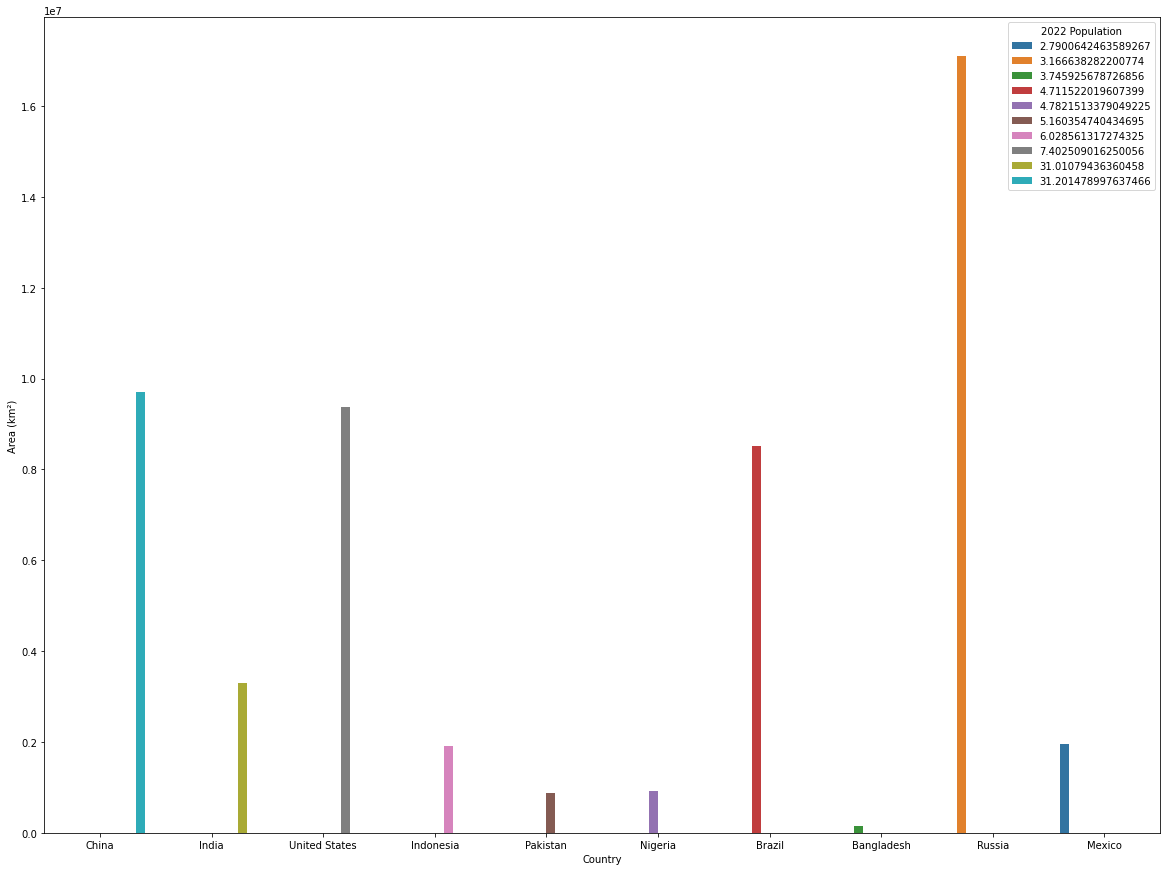

In [21]:
population_2022=df.sort_values(by="2022 Population",ascending=False).head(10)
fig, ax = plt.subplots(figsize =(20, 15))
x=population_2022["Country"]
y=population_2022["Area (km²)"]
hue=population_2022["2022 Population"]/sum(population_2022["2022 Population"])*100
sns.barplot(x = x,
            y = y,
            hue = hue,
            data = population_2022)
plt.show()

1.Russia is having largest area but less population i.e. it is less denser population country

2.India is having less area but more population (towards max population with slight differences with China). So, it is most dense population country.

3.China, USA, Brazil is having almost same Area but population is more in China and least in Brazil.

4.Per the Density column, Bangladesh appears to be the max density among top 10 countries with population of 3.7%
